[feature info](https://www.sciencedirect.com/science/article/abs/pii/S1568494618305799?via%3Dihub)

In [30]:
# general tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# feature engineering
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score

### EDA

In [2]:
df = pd.read_csv('data/pd_speech_features.csv')

In [3]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
# drop id column
df = df.drop('id', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.3 MB


In [6]:
df.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [7]:
df.isnull().sum().any()

False

### Feature Engineering

1. Seperate Train/Test Group:

In [8]:
# split out the test group from the training group
X = df.drop('class', axis=1)
y = df['class']

# setup train/test group with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

2. SMOTE (Synthetic Minority Oversampling Technique)

In [9]:
# apply SMOTE to training set
oversampling = SMOTE(sampling_strategy='minority', random_state=2000, n_jobs=-1)
X_train, y_train = oversampling.fit_resample(X_train, y_train)

# concat back to DataFrame for processing
df = pd.concat([X_train, y_train], axis=1)

3. Scaling Data

In [10]:
# initialize MinMaxScaler
mm = MinMaxScaler()

# save the index and column values
col_names = X_train.columns
indices = X_train.index

# fit and transform by the scaler
mm.fit(X_train)
X_train = mm.transform(X_train)

# convert transformed data back to DataFrame
X_train = pd.DataFrame(X_train, columns=col_names).set_index(indices)

### Feature Selection

In [12]:
# use RandomForest as feature selector
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
fs = SelectFromModel(rfc, threshold='1.5*mean')

# fit the training set to select features
fs.fit(X_train, y_train)
X_train = fs.transform(X_train)

In [13]:
features = fs.get_support()
selected_feature_indices = [i for i, sel in enumerate(features) if sel]
print(f'Length of selected features: {len(selected_feature_indices)}')

Length of selected features: 114


In [14]:
selected_feature_names = [col for i, col in enumerate(df.columns) if i in selected_feature_indices]
print(selected_feature_names[:10])

['DFA', 'minIntensity', 'maxIntensity', 'f1', 'f2', 'mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'mean_MFCC_5th_coef', 'mean_MFCC_6th_coef', 'std_Log_energy']


###  Modeling - Random Forest

In [21]:
# fit the model
model_to_fit = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model = model_to_fit.fit(X_train, y_train)

#### Test

In [22]:
# scaler transform
X_test = mm.transform(X_test)

# feature selection transform
X_test = fs.transform(X_test)

# predict y
y_pred = model.predict(X_test)

Baseline Model Results
Accuracy: 0.8881578947368421

Confusion Matrix: 
[[ 31  10]
 [  7 104]]

Classification: 
              precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.91      0.94      0.92       111

    accuracy                           0.89       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.89      0.89      0.89       152



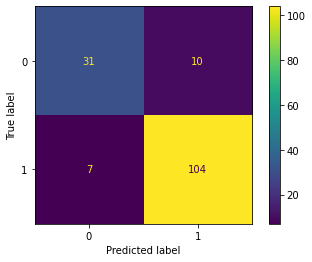

In [28]:
# print summary
print('Baseline Model Results')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Classification: \n{classification_report(y_test, y_pred)}')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
# plot with feature importance
# plot with precision/recall